In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [2]:
path = 'example_data/'
path3 = 'Calibration_data2/'
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0) #Creates an average bias frame to subtract from all measurements    

In [3]:
lamp_on  = []
lamp_off = []

sun_on  = []
sun_off = []

for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(1,4):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(path3+'T'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(4,7):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(path3+'T'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

In [4]:
lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [5]:
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

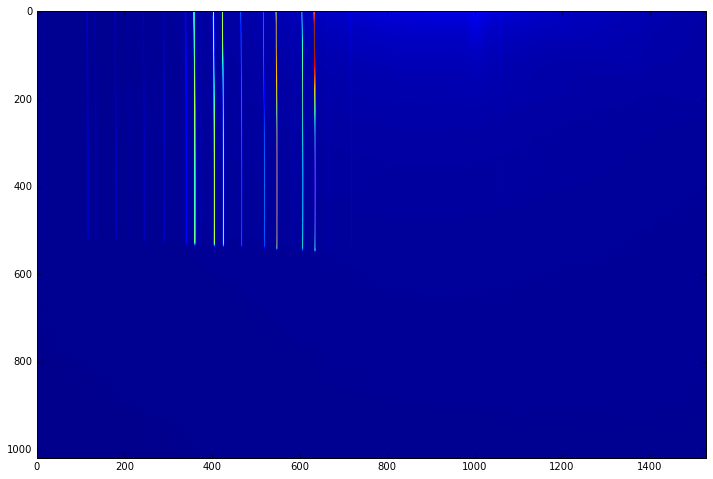

In [6]:
plt.imshow(avg_lamp)
plt.show()

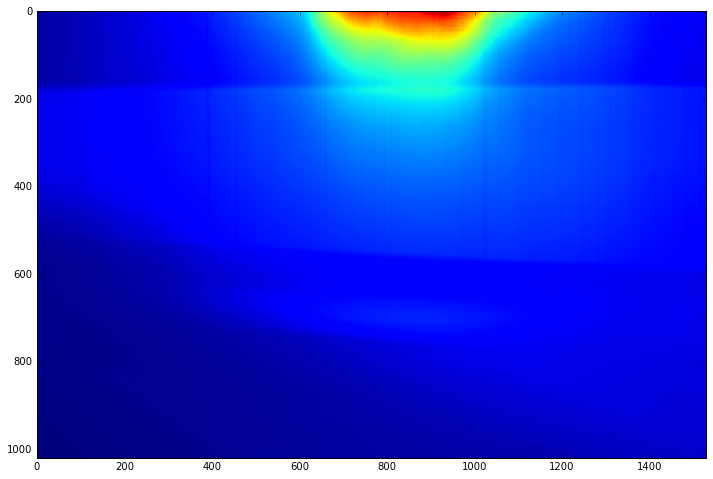

In [7]:
plt.imshow(avg_sun)
plt.show()

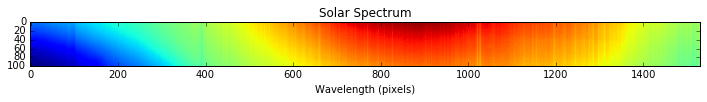

In [8]:
plt.imshow(avg_sun[400:500,:])
plt.title('Solar Spectrum')
plt.xlabel('Wavelength (pixels)')
plt.show()

<function matplotlib.pyplot.show>

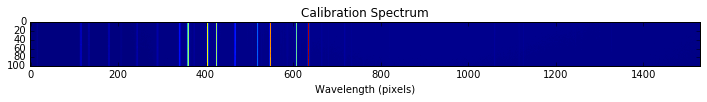

In [9]:
plt.imshow(avg_lamp[400:500,:])
plt.title('Calibration Spectrum')
plt.xlabel('Wavelength (pixels)')
plt.show

In [11]:
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0) #Averages the value along each column in the region that our spectra look relatively free of contamination
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

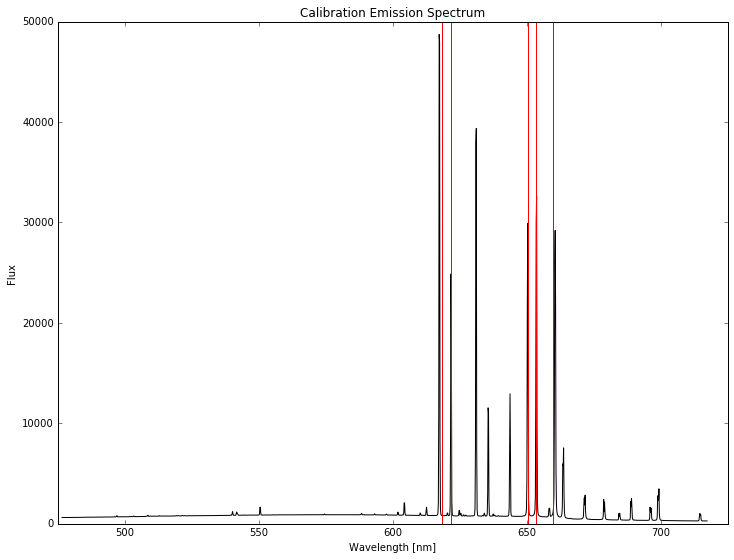

In [14]:
#example_lines = [617.2,687.1,696.5, 706.7,714.7] #These are for example purposes, not actual wavelengths for the lamp
example_lines = [618.2,621.7,650.6,653.3,659.895]

stretch = 6.35
shift = 476.5

plt.plot(np.flip(np.arange(len(lamp_good)),0) / stretch + shift, lamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.title('Calibration Emission Spectrum')
plt.xlim(475,725)
plt.show()

# The x-axis wavelength values are clearly incorrect. They need to be stretched and shifted so that the lines
# from the discharge tube match with their actual values. This correction can then also be applied to our solar spectra

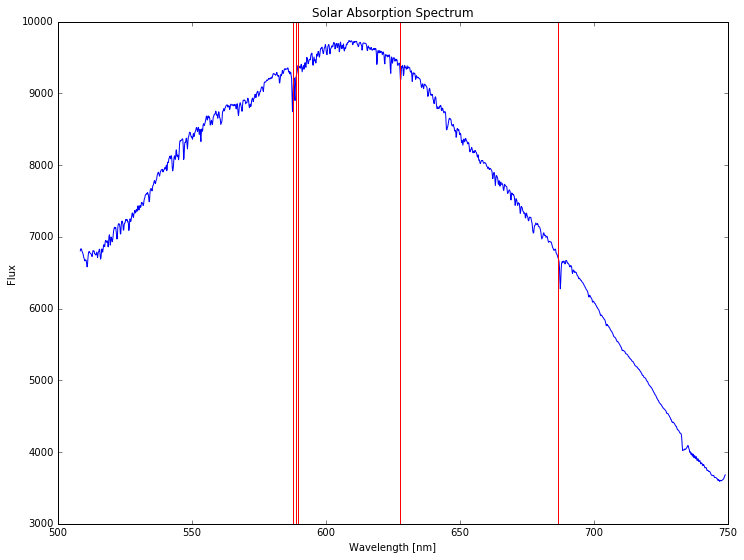

In [17]:
example_lines = [589.592,588.995,587.5618,686.719,627.661]

stretch = 6.35
shift = 508.3

plt.plot(np.flip(np.arange(len(lamp_good)),0) / stretch + shift, sun_good, 'b-')
for line in example_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.title('Solar Absorption Spectrum')
plt.show()

Line at 686.719 nm is the "B" line which is $O_{2}$
Lines at 589.592, 588.995, and 587.5618 nm are the "$D_{1}, D_{2}$, and $ D_{3}$" lines, which are Na, Na, and He respectively.
The fairly weak line at 627.661 is the "a" line, which also corresponds to  $O_{2}$